In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Load CSV files\
df_data = pd.read_csv('pandas/df_data.csv', low_memory=False)
df_filtered = pd.read_csv('pandas/df_filtered.csv')

agg_df = pd.read_csv('pandas/agg_df_cluster.csv')
fish_df = pd.read_csv('pandas/fish_df_cluster.csv')
agg_df_large = pd.read_csv('pandas/agg_df_large_cluster.csv')
fish_df_large = pd.read_csv('pandas/fish_df_large_cluster.csv')

In [4]:
# designate which clustering to analyze
df_explore = agg_df_large # or agg_df_large
fish_explore = fish_df_large # or fish_df_large


Cluster sizes:
cluster
11    1253
7      694
15      40
13      35
9       29
4       26
12      20
2       10
8        8
1        6
10       4
6        3
3        2
14       2
5        1
16       1
dtype: int64


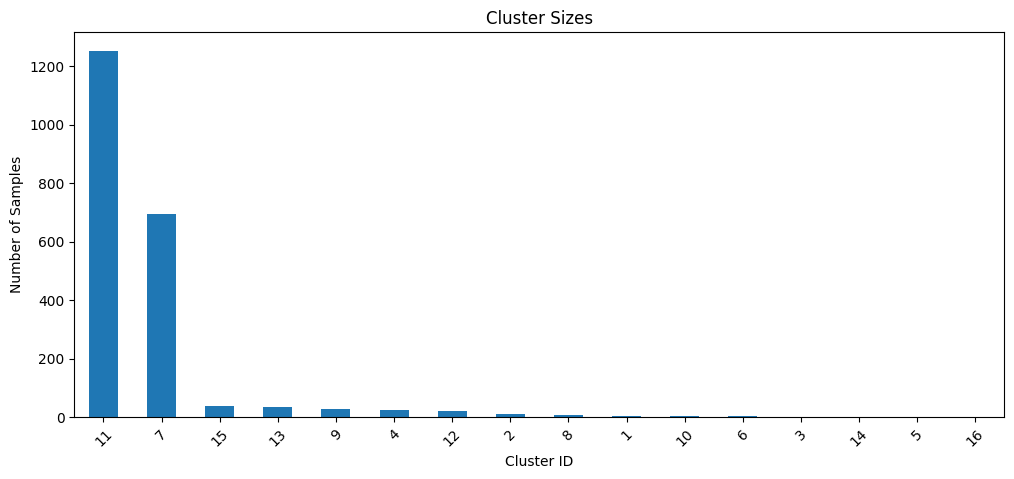

In [5]:
# Summary of clusters
cluster_summary = df_explore.groupby('cluster').size().sort_values(ascending=False)
print(f"\nCluster sizes:")
print(cluster_summary.head(30))

# Visualize cluster size distribution
plt.figure(figsize=(12, 5))
cluster_summary.plot(kind='bar')
plt.xlabel('Cluster ID')
plt.ylabel('Number of Samples')
plt.title('Cluster Sizes')
plt.xticks(rotation=45);
#print(agg_df.groupby('cluster').size())

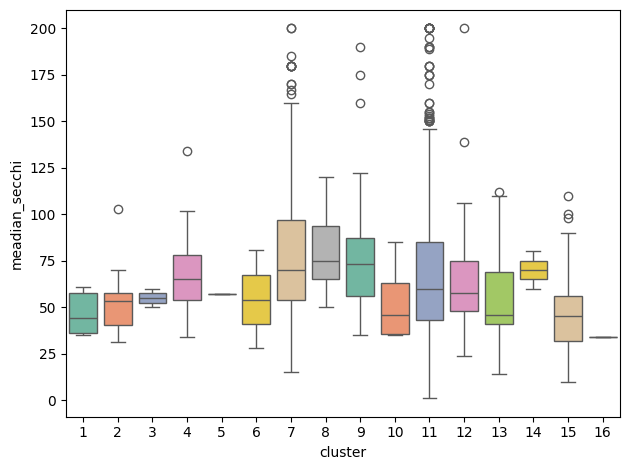

In [6]:
sns.boxplot(x='cluster', y='meadian_secchi', hue='cluster', data=df_explore, palette='Set2', legend=False)
plt.tight_layout()
plt.show()